In [3]:
pip install pandas

317.01s - pydevd: Sending message related to process being replaced timed-out after 5 seconds


Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.1/13.1 MB 3.7 MB/s eta 0:00:00m eta 0:00:010:01:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 346.6/346.6 KB 4.1 MB/s eta 0:00:00 MB/s eta 0:00:01:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.3/16.3 MB 3.9 MB/s eta 0:00:00m eta 0:00:010:00:01
Note: you may need to restart the kernel to use updated packages.


In [4]:
import pandas as pd

In [6]:
df = pd.read_csv('YO/FMLV031024/2024_10_03-11_58_51_RR.csv')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2224 entries, 0 to 2223
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    0 non-null      float64
 1   RtoR    2224 non-null   int64  
dtypes: float64(1), int64(1)
memory usage: 34.9 KB


In [9]:
df.head()

,Time,RtoR
0,NaN,17729
1,NaN,13114
2,NaN,253
3,NaN,3176
4,NaN,10164


In [10]:
df['RtoR'].unique()

array([17729, 13114,   253,  3176, 10164,  1338,   441,   190,    91,
         314,   830,   856, 27396,   593,  5249,   821,   640,  1504,
          65,   696,   121,   452,   396,    17,   523,   272,   831,
         430,  5137,   868,  1921,   911,   250,   281,   282,   139,
        4278,  2242,   386,    37,   675,   126,   323,  1279,   151,
         257,   406,   192,   337,   482,   124,   545,   316,   130,
         298,   212,   182,   425,    84,   579,   236,   177,   433,
          33,   580,   326,   142,   156,   344,  1269,   341,   409,
         395,   175,   493,   351,   209,   381,  1097,   101,   235,
         186,   361,   184,   200,   456,  1267,   287,   676,   417,
        1670, 13182,   810,  5273,  1905,    96,  1152,  4842, 13632,
         828,   402,   216,   378,  3236,  8600,  4176,  3112,   913,
         914,   976,    83,   223,   333,   154,   390,   231,   176,
         846,   438,  6046,   447,   418,   435,    74,   222,   693,
         302,    75,

In [12]:
# Get all types in a column
types_in_column = df['RtoR'].apply(type)

# Show unique types
unique_types = types_in_column.unique()

print("Unique types in the column:", unique_types)

Unique types in the column: [<class 'int'>]


In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Data loading function
def load_data(filepath):
    try:
        if filepath.endswith(".csv") or filepath.endswith(".txt"):
            data = pd.read_csv(filepath, sep=",", engine='python')
        elif filepath.endswith(".xlsx"):
            data = pd.read_excel(filepath)
        elif filepath.endswith(".json"):
            data = pd.read_json(filepath)
        else:
            raise ValueError("Unsupported file format")

        # Ensure column names and numeric conversion
        if data.shape[1] < 2:
            raise ValueError("Data file must have at least two columns")

        if not pd.api.types.is_numeric_dtype(data.iloc[:, 0]):
            data.columns = data.iloc[0]
            data = data[1:].reset_index(drop=True)
        data.columns = ['x', 'y']
        data = data.apply(pd.to_numeric, errors='coerce').dropna()

        return data
    except Exception as e:
        print(f"Error loading data: {e}")
        return None

# Plotting function
def plot_data(data):
    if data is None or data.empty:
        print("No valid data to plot.")
        return

    fig, ax = plt.subplots()
    ax.scatter(data['x'], data['y'], color='blue', s=100)
    ax.set_title("Data Plot")
    ax.set_xlabel("X")
    ax.set_ylabel("Y")
    ax.grid(True)
    plt.show()

# Example usage
if __name__ == "__main__":
    filepath = input("Enter the file path: ")
    data = load_data(filepath)
    plot_data(data)


In [17]:
import matplotlib.pyplot as plt
import pandas as pd

def load_and_plot_data(filepath):
    """
    Loads data from a file and plots it. Designed for use in Jupyter Notebooks.
    
    Parameters:
        filepath (str): The path to the data file.
    
    Returns:
        None
    """
    try:
        # Load the data based on file extension
        if filepath.endswith(".csv") or filepath.endswith(".txt"):
            data = pd.read_csv(filepath, sep=None, engine='python')  # Auto-detect delimiter
        elif filepath.endswith(".xlsx"):
            data = pd.read_excel(filepath)
        elif filepath.endswith(".json"):
            data = pd.read_json(filepath)
        else:
            raise ValueError("Unsupported file format")

        # Debugging prints: Original data
        print("Original Data File:")
        print(data.head())

        # Handle single-column files
        if data.shape[1] == 1:
            data.columns = ['y']
            data['x'] = range(len(data))
        elif data.shape[1] >= 2:
            # Ensure correct column naming
            data.columns = data.columns[:2]  # Take only the first two columns
            data.columns = ['x', 'y']
        else:
            raise ValueError("Data file must have at least one or two columns")

        # Convert to numeric and drop rows with NaNs
        data = data.apply(pd.to_numeric, errors='coerce').dropna()

        # Debugging prints: Processed data
        print("Processed Data:")
        print(data.head())

        # Plot the data
        fig, ax = plt.subplots()
        ax.scatter(data['x'], data['y'], color='blue', s=100)
        ax.set_title("Data Plot")
        ax.set_xlabel("X")
        ax.set_ylabel("Y")
        ax.grid(True)
        plt.show()
    
    except Exception as e:
        print(f"Error: {e}")

# Example usage in a Jupyter Notebook
# filepath = "path_to_your_file.csv"
# load_and_plot_data(filepath)



Original Data File:
   Time   RtoR
0   NaN  17729
1   NaN  13114
2   NaN    253
3   NaN   3176
4   NaN  10164
Processed Data:
Empty DataFrame
Columns: [x, y]
Index: []


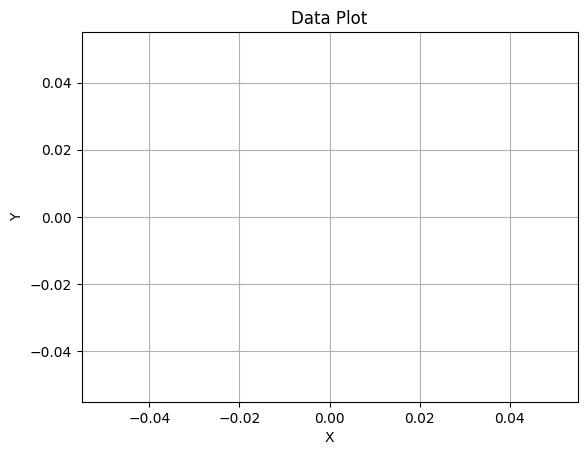

In [18]:
# Example usage in a Jupyter Notebook
filepath = "YO/FMLV031024/2024_10_03-11_58_51_RR.csv"
load_and_plot_data(filepath)

In [33]:
import pandas as pd

# Load the file and skip the header
file_path = 'YO/FMLV031024/2024_10_03-11_58_51_RR.csv'
data = pd.read_csv(file_path, header=None, skiprows=1)  # Skip the header row
print(data)
# Check for NaN in the first column and fill it with sequential numbers starting from 1
data[0] = data[0].fillna(pd.Series(range(1, len(data) + 1)))

# Rename columns for clarity
data.columns = ['x', 'y']

# Display the resulting DataFrame
print("Processed Data:")
print(data)

# Save the updated DataFrame back to a file if needed
data.to_csv('updated_data.csv', index=False)


       0      1
0    NaN  17729
1    NaN  13114
2    NaN    253
3    NaN   3176
4    NaN  10164
...   ..    ...
2219 NaN    855
2220 NaN   3246
2221 NaN    785
2222 NaN    400
2223 NaN   4521

[2224 rows x 2 columns]
Processed Data:
           x      y
0        1.0  17729
1        2.0  13114
2        3.0    253
3        4.0   3176
4        5.0  10164
...      ...    ...
2219  2220.0    855
2220  2221.0   3246
2221  2222.0    785
2222  2223.0    400
2223  2224.0   4521

[2224 rows x 2 columns]


In [28]:
import matplotlib.pyplot as plt
import pandas as pd


def load_and_plot_data(filepath):
    """
    Loads data from a file and plots it. Designed for use in Jupyter Notebooks.
    
    Parameters:
        filepath (str): The path to the data file.
    
    Returns:
        None
    """
    try:
        # Load the data explicitly ignoring headers/skiprows to ensure correct alignment
        data = pd.read_csv(filepath, header=0)  # Ensure header is explicitly loaded
        
        # Debugging prints: raw data
        print("Original Data File:")
        print(data.head())

        # Manually handle misaligned/NaN values for the first column
        if 'Time' in data.columns:
            # Replace NaN values with sequential index to maintain integrity
            data['Time'] = pd.to_numeric(data['Time'], errors='coerce')
            data['Time'].fillna(pd.Series(range(1, len(data) + 1)), inplace=True)

        # Ensure only the first two columns are used as x and y values
        data.columns = ['x', 'y']

        # Convert numeric values only
        data = data.apply(pd.to_numeric, errors='coerce').dropna()

        # Debugging prints
        print("Processed Data:")
        print(data.head())

        # Plot the data
        fig, ax = plt.subplots()
        ax.scatter(data['x'], data['y'], color='blue', s=100)
        ax.set_title("Data Plot")
        ax.set_xlabel("X")
        ax.set_ylabel("Y")
        ax.grid(True)
        plt.show()

    except Exception as e:
        print(f"Error: {e}")


# Example usage in a Jupyter Notebook
# filepath = "/your/path/to/file.csv"
# load_and_plot_data(filepath)



Original Data File:
   Time   RtoR
0   NaN  17729
1   NaN  13114
2   NaN    253
3   NaN   3176
4   NaN  10164
Processed Data:
     x      y
0  1.0  17729
1  2.0  13114
2  3.0    253
3  4.0   3176
4  5.0  10164


/tmp/ipykernel_14077/3424178295.py:27: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Time'].fillna(pd.Series(range(1, len(data) + 1)), inplace=True)


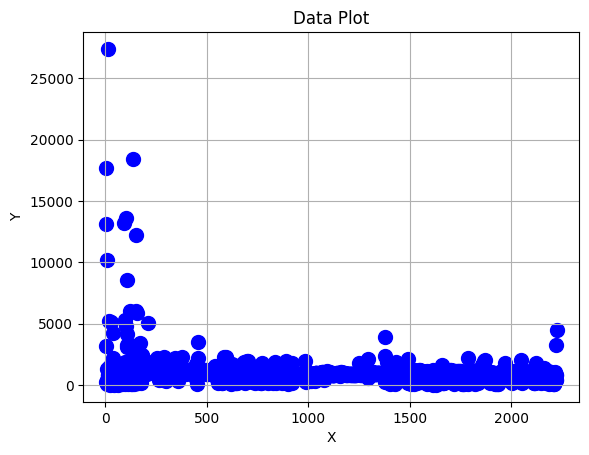

In [29]:
# Example usage in a Jupyter Notebook
filepath = "YO/FMLV031024/2024_10_03-11_58_51_RR.csv"
load_and_plot_data(filepath)

In [30]:
import matplotlib.pyplot as plt
import pandas as pd


def load_and_plot_data(filepath):
    """
    Loads data from a file and plots it. Designed for use in Jupyter Notebooks.
    
    Parameters:
        filepath (str): The path to the data file.
    
    Returns:
        None
    """
    try:
        # Load the data explicitly ignoring headers to ensure correct alignment
        data = pd.read_csv(filepath, header=0)  # Ensure header is explicitly loaded
        
        # Debugging prints: raw data
        print("Original Data File:")
        print(data.head())

        # Manually handle misaligned/NaN values for the first column
        if 'Time' in data.columns:
            # Replace NaN values with sequential index to maintain integrity
            data['Time'] = pd.to_numeric(data['Time'], errors='coerce')
            data['Time'] = data['Time'].fillna(pd.Series(range(1, len(data) + 1)))  # Fix chained assignment warning

        # Ensure only the first two columns are used as x and y values
        data.columns = ['x', 'y']

        # Convert numeric values only
        data = data.apply(pd.to_numeric, errors='coerce').dropna()

        # Debugging prints
        print("Processed Data:")
        print(data.head())

        # Plot the data
        fig, ax = plt.subplots()
        ax.scatter(data['x'], data['y'], color='blue', s=100)
        ax.set_title("Data Plot")
        ax.set_xlabel("X")
        ax.set_ylabel("Y")
        ax.grid(True)
        plt.show()

    except Exception as e:
        print(f"Error: {e}")


# Example usage in a Jupyter Notebook
# filepath = "/your/path/to/file.csv"
# load_and_plot_data(filepath)


Original Data File:
   Time   RtoR
0   NaN  17729
1   NaN  13114
2   NaN    253
3   NaN   3176
4   NaN  10164
Processed Data:
     x      y
0  1.0  17729
1  2.0  13114
2  3.0    253
3  4.0   3176
4  5.0  10164


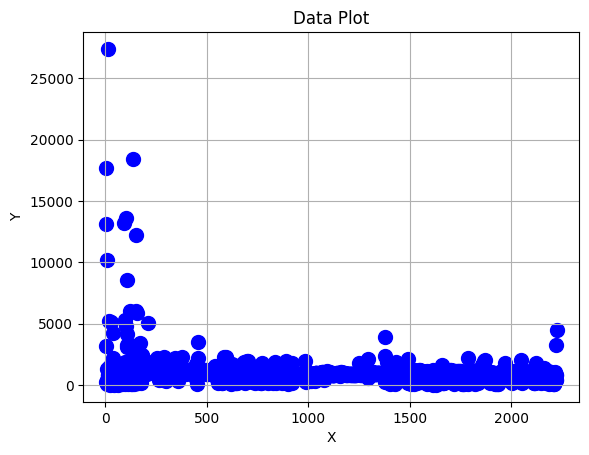

In [31]:
# Example usage in a Jupyter Notebook
filepath = "YO/FMLV031024/2024_10_03-11_58_51_RR.csv"
load_and_plot_data(filepath)